# OpenClassrooms - Ingenieur IA
# Projet 9 - My Content - Partie 1 : Analyse et préparation des données
# Réalisez une application mobile de recommandation de contenu

## Objectif du projet : 
- **Réalisez une application mobile de recommandation de contenu**

## Plan :
- **Partie 1 : Analyse et préparation des données**
    - Chargement des données
    - Analyse Exploratoire des Données
    - Nettoyage des données
    - Séparation des données
    - Sauvegarde des données préparées
    
    
- **Partie 2 : Modélisation et évaluation**
    - Baseline recommandation
        - Modèle basé sur la popularité des articles
    - Content Based recommandation
        - Modèle basé sur la catégorie des articles
        - Modèle basé sur la similarité entre les articles
    - Collaborative Filtering recommandation
        - Model based
            - ALS Model
            - BPR Model
            - LMF Model
        - Memory based
            - Nearest Neighbours with Cosine Recommender Model
    - Récapitulatif et choix du meilleur modèle
    
    
- **Partie 3 : Préparation au déploiement**
    - Récupération du Workpsace Azure
    - Identifications des éléments
    - Enregistrement des données nécessaires au déploiement dans Azure

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import os

# Partie 1 : Analyse et préparation des données

## Données :
- CLICKS :
    - fichier : clicks_sample.csv
    - répertoire : clicks


- ARTICLES :
    - fichier : articles_metadata.csv
    - fichier : articles_embeddings.pickle

## Chargement des données

### Fichiers CLICKS
- Fichiers CSV (un par heure), contenant les sessions et interactions des utilisateurs sur le portail d'articles

#### Clicks sample

In [2]:
df_clicks_sample = pd.read_csv('../../data/news-portal-user-interactions-by-globocom/clicks_sample.csv')

In [3]:
nb_rows = df_clicks_sample.shape[0]
nb_columns = df_clicks_sample.shape[1]
print(f"Nombre de lignes : {nb_rows}")
print(f"Nombre de colonnes : {nb_columns}")

Nombre de lignes : 1883
Nombre de colonnes : 12


In [4]:
df_clicks_sample.head(10)

,user_id,session_id,session_start,session_size,click_article_id,click_timestamp,click_environment,click_deviceGroup,click_os,click_country,click_region,click_referrer_type
0,0,1506825423271737,1506825423000,2,157541,1506826828020,4,3,20,1,20,2
1,0,1506825423271737,1506825423000,2,68866,1506826858020,4,3,20,1,20,2
2,1,1506825426267738,1506825426000,2,235840,1506827017951,4,1,17,1,16,2
3,1,1506825426267738,1506825426000,2,96663,1506827047951,4,1,17,1,16,2
4,2,1506825435299739,1506825435000,2,119592,1506827090575,4,1,17,1,24,2
5,2,1506825435299739,1506825435000,2,30970,1506827120575,4,1,17,1,24,2
6,3,1506825442704740,1506825442000,2,236065,1506827536942,4,3,2,1,21,1
7,3,1506825442704740,1506825442000,2,236294,1506827566942,4,3,2,1,21,1
8,4,1506825528135741,1506825528000,2,48915,1506826927593,4,1,17,1,17,1
9,4,1506825528135741,1506825528000,2,44488,1506826957593,4,1,17,1,17,1


In [5]:
df_clicks_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1883 entries, 0 to 1882
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   user_id              1883 non-null   int64
 1   session_id           1883 non-null   int64
 2   session_start        1883 non-null   int64
 3   session_size         1883 non-null   int64
 4   click_article_id     1883 non-null   int64
 5   click_timestamp      1883 non-null   int64
 6   click_environment    1883 non-null   int64
 7   click_deviceGroup    1883 non-null   int64
 8   click_os             1883 non-null   int64
 9   click_country        1883 non-null   int64
 10  click_region         1883 non-null   int64
 11  click_referrer_type  1883 non-null   int64
dtypes: int64(12)
memory usage: 176.7 KB


In [6]:
df_clicks_sample.describe()

,user_id,session_id,session_start,session_size,click_article_id,click_timestamp,click_environment,click_deviceGroup,click_os,click_country,click_region,click_referrer_type
count,1883.000000,1.883000e+03,1.883000e+03,1883.000000,1883.000000,1.883000e+03,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000
mean,355.893787,1.506828e+15,1.506828e+12,3.459904,176717.848646,1.506830e+12,3.917153,2.305895,12.113648,1.491768,18.774827,1.764206
std,206.162865,8.679628e+08,8.679468e+05,3.037467,82324.177259,1.064938e+07,0.410461,1.062301,7.825735,2.007772,7.083400,1.225679
min,0.000000,1.506825e+15,1.506825e+12,2.000000,2137.000000,1.506827e+12,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000
25%,181.500000,1.506827e+15,1.506827e+12,2.000000,108854.000000,1.506828e+12,4.000000,1.000000,2.000000,1.000000,13.000000,1.000000
50%,353.000000,1.506828e+15,1.506828e+12,3.000000,157541.000000,1.506828e+12,4.000000,3.000000,17.000000,1.000000,21.000000,1.000000
75%,537.000000,1.506828e+15,1.506828e+12,4.000000,236697.500000,1.506829e+12,4.000000,3.000000,19.000000,1.000000,25.000000,2.000000
max,706.000000,1.506829e+15,1.506829e+12,24.000000,363291.000000,1.506998e+12,4.000000,4.000000,20.000000,11.000000,28.000000,7.000000


#### Analyse :
- Chaque fichier click contient 12 colonnes
    - **user_id :** identifiant utilisateur
    - **session_id :** identifiant session
    - **session_start :** début de la session (timestamp)
    - **session_size :** nombre de clicks pour la session
    - **words_count :** nombre de mots contenus dans l'article
    - **click_article_id :** identifiant de l'article sur lequel l'utilisateur a clické
    - **click_timestamp :** quand l'utilisateur a clické (timestamp)
    - **click_environment :** environnement de l'utilisateur
    - **click_deviceGroup :** type de device utilisé par l'utilisateur
    - **click_os :** OS de l'utilisateur
    - **click_country :** localisation (pays) de l'utilisateur
    - **click_region :** localisation (région) de l'utilisateur
    - **click_referrer_type :** type de référence vers l'article

#### Concatenation des fichiers clicks

In [7]:
if not os.path.exists('clicks.csv'):
    clicks_path = []
    clicks_dir = "../../data/news-portal-user-interactions-by-globocom/clicks"

    clicks_path = clicks_path + sorted(
            [
                os.path.join(clicks_dir, fname)
                for fname in os.listdir(clicks_dir)
                if fname.endswith(".csv")
            ]
        )
    print("Nombre de fichiers clicks csv:", len(clicks_path))

    list_clicks_df = []

    for filename in clicks_path:
        df = pd.read_csv(filename, index_col=None, header=0)
        list_clicks_df.append(df)

    df_clicks = pd.concat(list_clicks_df, axis=0, ignore_index=True)
    df_clicks.to_csv('clicks.csv', index=False)
else:
    df_clicks = pd.read_csv('clicks.csv')

Nombre de fichiers clicks csv: 385


In [8]:
df_clicks.head(10)

,user_id,session_id,session_start,session_size,click_article_id,click_timestamp,click_environment,click_deviceGroup,click_os,click_country,click_region,click_referrer_type
0,0,1506825423271737,1506825423000,2,157541,1506826828020,4,3,20,1,20,2
1,0,1506825423271737,1506825423000,2,68866,1506826858020,4,3,20,1,20,2
2,1,1506825426267738,1506825426000,2,235840,1506827017951,4,1,17,1,16,2
3,1,1506825426267738,1506825426000,2,96663,1506827047951,4,1,17,1,16,2
4,2,1506825435299739,1506825435000,2,119592,1506827090575,4,1,17,1,24,2
5,2,1506825435299739,1506825435000,2,30970,1506827120575,4,1,17,1,24,2
6,3,1506825442704740,1506825442000,2,236065,1506827536942,4,3,2,1,21,1
7,3,1506825442704740,1506825442000,2,236294,1506827566942,4,3,2,1,21,1
8,4,1506825528135741,1506825528000,2,48915,1506826927593,4,1,17,1,17,1
9,4,1506825528135741,1506825528000,2,44488,1506826957593,4,1,17,1,17,1


In [9]:
nb_rows = df_clicks.shape[0]
nb_columns = df_clicks.shape[1]
print(f"Nombre de lignes : {nb_rows}")
print(f"Nombre de colonnes : {nb_columns}")

Nombre de lignes : 2988181
Nombre de colonnes : 12


In [10]:
df_clicks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2988181 entries, 0 to 2988180
Data columns (total 12 columns):
 #   Column               Dtype 
---  ------               ----- 
 0   user_id              object
 1   session_id           object
 2   session_start        object
 3   session_size         object
 4   click_article_id     object
 5   click_timestamp      object
 6   click_environment    object
 7   click_deviceGroup    object
 8   click_os             object
 9   click_country        object
 10  click_region         object
 11  click_referrer_type  object
dtypes: object(12)
memory usage: 273.6+ MB


### Fichiers ARTICLES

#### Articles metadata
- Fichier CSV contenant des informations sur les articles

In [11]:
df_articles_metadata = pd.read_csv('../../data/news-portal-user-interactions-by-globocom/articles_metadata.csv')

In [12]:
nb_rows = df_articles_metadata.shape[0]
nb_columns = df_articles_metadata.shape[1]
print(f"Nombre de lignes : {nb_rows}")
print(f"Nombre de colonnes : {nb_columns}")

Nombre de lignes : 364047
Nombre de colonnes : 5


In [13]:
df_articles_metadata.head(10)

,article_id,category_id,created_at_ts,publisher_id,words_count
0,0,0,1513144419000,0,168
1,1,1,1405341936000,0,189
2,2,1,1408667706000,0,250
3,3,1,1408468313000,0,230
4,4,1,1407071171000,0,162
5,5,1,1407413929000,0,196
6,6,1,1409896802000,0,203
7,7,1,1412559620000,0,154
8,8,1,1414351550000,0,209
9,9,1,1412526792000,0,181


In [14]:
df_articles_metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364047 entries, 0 to 364046
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype
---  ------         --------------   -----
 0   article_id     364047 non-null  int64
 1   category_id    364047 non-null  int64
 2   created_at_ts  364047 non-null  int64
 3   publisher_id   364047 non-null  int64
 4   words_count    364047 non-null  int64
dtypes: int64(5)
memory usage: 13.9 MB


In [15]:
df_articles_metadata.describe()

,article_id,category_id,created_at_ts,publisher_id,words_count
count,364047.000000,364047.000000,3.640470e+05,364047.0,364047.000000
mean,182023.000000,283.108239,1.474070e+12,0.0,190.897727
std,105091.461061,136.723470,4.293038e+10,0.0,59.502766
min,0.000000,0.000000,1.159356e+12,0.0,0.000000
25%,91011.500000,199.000000,1.444925e+12,0.0,159.000000
50%,182023.000000,301.000000,1.489422e+12,0.0,186.000000
75%,273034.500000,399.000000,1.509891e+12,0.0,218.000000
max,364046.000000,460.000000,1.520943e+12,0.0,6690.000000


In [16]:
df_articles_metadata['article_id'].nunique()

364047

In [17]:
df_articles_metadata['category_id'].nunique()

461

In [18]:
df_articles_metadata['publisher_id'].unique()

array([0], dtype=int64)

#### Analyse :
- Il y a **364 047 articles** dans **461 catégories**
- Le fichier contient 5 colonnes : 
    - **article_id :** identifiant de l'article
    - **category_id :** identifiant de la catégorie de l'article
    - **created_at_ts :** date de création (timestamp)
    - **publisher_id :** identifiant de l'éditeur de l'article
    - **words_count :** nombre de mots contenus dans l'article

#### Articles embeddings
- Matrice NumPy contenant les Embeddings (plongements) des articles, entrainés sur les texte et les données des articles
- Les Embeddings sont des vecteurs de dimension 250

In [19]:
matrix_articles_embeddings = pd.read_pickle('../../data/news-portal-user-interactions-by-globocom/articles_embeddings.pickle')

In [20]:
nb_rows = matrix_articles_embeddings.shape[0]
nb_columns = matrix_articles_embeddings.shape[1]
print(f"Nombre de lignes : {nb_rows}")
print(f"Nombre de colonnes : {nb_columns}")

Nombre de lignes : 364047
Nombre de colonnes : 250


In [21]:
matrix_articles_embeddings[0]

array([-0.16118301, -0.95723313, -0.13794445,  0.05085534,  0.83005524,
        0.90136534, -0.33514765, -0.55956066, -0.50060284,  0.16518293,
        0.4284342 ,  0.3550556 ,  0.87443674, -0.52888286,  0.6254872 ,
        0.2689198 , -0.8228351 , -0.703853  , -0.62584543, -0.15285493,
       -0.6662412 ,  0.04329487,  0.1786375 ,  0.04689008,  0.5945311 ,
       -0.18334764,  0.19510683, -0.46763963, -0.30480695,  0.35317516,
        0.27818817,  0.5386231 , -0.37120935,  0.48989806, -0.10383289,
        0.11917368,  0.13243659, -0.62108386, -0.45331132,  0.34662652,
       -0.06174106, -0.7305939 , -0.38411567, -0.94075835,  0.06134219,
        0.4825816 ,  0.28968322, -0.62269634, -0.05000444,  0.42151213,
       -0.24257636,  0.6687105 , -0.509004  , -0.46179956,  0.04390178,
        0.28848746,  0.4498246 , -0.28486234,  0.916729  ,  0.70312876,
        0.85167396, -0.6272441 ,  0.35773164,  0.3901894 ,  0.65293527,
        0.1036527 ,  0.79829276, -0.10254639, -0.2045143 ,  0.37

### Fusion des DataFrames Clicks et Articles Metadata

In [22]:
df_data = df_clicks.merge(df_articles_metadata, left_on='click_article_id', right_on='article_id')#, how='right')

In [23]:
df_data

,user_id,session_id,session_start,session_size,click_article_id,click_timestamp,click_environment,click_deviceGroup,click_os,click_country,click_region,click_referrer_type,article_id,category_id,created_at_ts,publisher_id,words_count
0,0,1506825423271737,1506825423000,2,157541,1506826828020,4,3,20,1,20,2,157541,281,1506800518000,0,280
1,20,1506825727279757,1506825727000,2,157541,1506836548634,4,1,17,1,9,1,157541,281,1506800518000,0,280
2,44,1506826139185781,1506826139000,5,157541,1506857278141,4,1,17,1,12,1,157541,281,1506800518000,0,280
3,45,1506826142324782,1506826142000,2,157541,1506827309970,4,1,17,1,17,1,157541,281,1506800518000,0,280
4,76,1506826463226813,1506826463000,2,157541,1506828823469,4,3,2,1,21,1,157541,281,1506800518000,0,280
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2988176,195186,1508210422411129,1508210422000,4,2221,1508210469562,4,3,2,1,1,1,2221,1,1508192469000,0,103
2988177,75658,1508210696185183,1508210696000,4,271117,1508210951703,4,1,17,1,4,2,271117,399,1504276061000,0,156
2988178,217129,1508210976336246,1508210976000,2,20204,1508210990810,4,3,2,1,21,5,20204,9,1491934410000,0,242
2988179,217129,1508210976336246,1508210976000,2,70196,1508211020810,4,3,2,1,21,5,70196,136,1491298495000,0,206


In [24]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2988181 entries, 0 to 2988180
Data columns (total 17 columns):
 #   Column               Dtype 
---  ------               ----- 
 0   user_id              object
 1   session_id           object
 2   session_start        object
 3   session_size         object
 4   click_article_id     object
 5   click_timestamp      object
 6   click_environment    object
 7   click_deviceGroup    object
 8   click_os             object
 9   click_country        object
 10  click_region         object
 11  click_referrer_type  object
 12  article_id           int64 
 13  category_id          int64 
 14  created_at_ts        int64 
 15  publisher_id         int64 
 16  words_count          int64 
dtypes: int64(5), object(12)
memory usage: 410.4+ MB


## Analyse Exploratoire des Données

In [25]:
nb_rows = df_data.shape[0]
nb_columns = df_data.shape[1]
print(f"Nombre de lignes : {nb_rows}")
print(f"Nombre de colonnes : {nb_columns}")

Nombre de lignes : 2988181
Nombre de colonnes : 17


### Nombre d'utilisateurs

In [26]:
nb_unique_users = df_data['user_id'].nunique()
print(f"Nb users = {nb_unique_users}")

Nb users = 322897


### Nombre d'articles clickés

In [27]:
nb_unique_articles = df_data['article_id'].nunique()
print(f"Nb articles clicked = {nb_unique_articles}")

Nb articles clicked = 46033


### Nombre de categories des articles clickés

In [28]:
nb_unique_categories = df_data['category_id'].nunique()
print(f"Nb articles categories clicked = {nb_unique_categories}")

Nb articles categories clicked = 316


### Nombre de clicks

In [29]:
nb_clicks = len(df_data)
print(f"Nb clicks = {nb_clicks}")

Nb clicks = 2988181


### Taille des sessions (nb clicks par session)

In [30]:
df_data['session_size'].unique()

array([2, 5, 3, 4, 9, 7, 6, 10, 11, 8, 13, 15, 16, 24, 14, 18, 12, 42, 51,
       26, 30, 17, 20, 23, 19, 21, 35, 48, 27, 37, 22, 25, 41, 39, 32, 29,
       75, 28, 36, 67, 52, 53, 33, 43, 46, 31, 82, 72, 124, 44, 86, 38,
       106, 57, 74, 34, 62, 71, 58, 47, 92, 65, 40, 98, 59, 107, 79, 45,
       60, 94, 56, 68], dtype=object)

### Identifiant de l'éditeur des articles

In [31]:
df_data['publisher_id'].unique()

array([0], dtype=int64)

##### Remarque :
- la colonne est vide (uniquement des zéros)
- nous pourrons la supprimer lors du nettoyage des données

### Informations concernant les clicks

In [32]:
df_data['click_environment'].unique()

array([4, 2, 1], dtype=object)

In [33]:
df_data['click_deviceGroup'].unique()

array([3, 1, 4, 5, 2], dtype=object)

In [34]:
df_data['click_os'].unique()

array([20, 17, 2, 12, 13, 19, 3, 5], dtype=object)

In [35]:
df_data['click_country'].unique()

array([1, 10, 7, 8, 2, 11, 6, 4, 9, 3, 5], dtype=object)

In [36]:
df_data['click_region'].unique()

array([20, 9, 12, 17, 21, 28, 24, 25, 11, 5, 8, 26, 16, 13, 15, 6, 7, 19,
       18, 10, 4, 2, 27, 14, 1, 3, 22, 23], dtype=object)

In [37]:
df_data['click_referrer_type'].unique()

array([2, 1, 7, 5, 4, 6, 3], dtype=object)

### Distribution du nombre de clicks par session

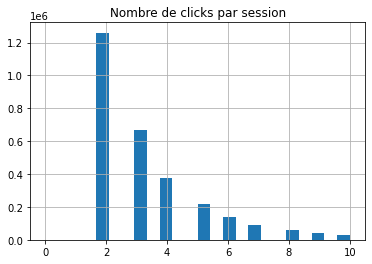

In [38]:
df_data['session_size'].hist(bins=24, range=(0,10))
_=plt.title('Nombre de clicks par session')

### Distribution du nombre de sessions par utilisateur

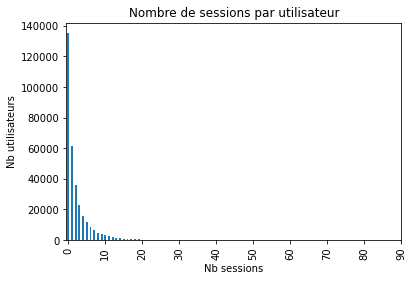

In [39]:
_=df_data.groupby(by="user_id")['session_id'].nunique().value_counts().plot(kind = 'bar', title="Nombre de sessions par utilisateur", xticks = range(0, 100, 10), xlabel = "Nb sessions", ylabel="Nb utilisateurs")

### Distribution du nombre d'articles lus par utilisateur

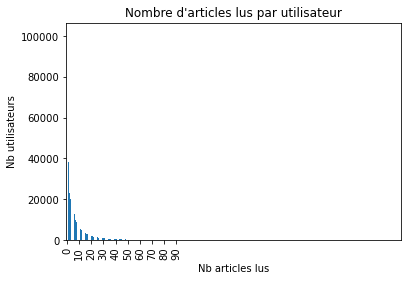

In [40]:
_=df_data.groupby(by="user_id")['click_article_id'].nunique().value_counts().plot(kind = 'bar', title="Nombre d'articles lus par utilisateur", xticks=range(0, 100, 10), xlabel = "Nb articles lus", ylabel="Nb utilisateurs")

## Nettoyage des données

### Suppression des NA

In [41]:
df_data.isna().any()

user_id                False
session_id             False
session_start          False
session_size           False
click_article_id       False
click_timestamp        False
click_environment      False
click_deviceGroup      False
click_os               False
click_country          False
click_region           False
click_referrer_type    False
article_id             False
category_id            False
created_at_ts          False
publisher_id           False
words_count            False
dtype: bool

##### Analyse :
- Il n'y a pas de NA

### Suppression des doublons

In [42]:
df_data.duplicated().any()

False

In [43]:
df_data =  df_data.drop_duplicates()

In [44]:
nb_rows = df_data.shape[0]
nb_columns = df_data.shape[1]
print(f"Nombre de lignes : {nb_rows}")
print(f"Nombre de colonnes : {nb_columns}")

Nombre de lignes : 2988181
Nombre de colonnes : 17


##### Analyse :
- Il n'y a pas de doublons

### Suppression des colonnes inutiles

In [45]:
df_data

,user_id,session_id,session_start,session_size,click_article_id,click_timestamp,click_environment,click_deviceGroup,click_os,click_country,click_region,click_referrer_type,article_id,category_id,created_at_ts,publisher_id,words_count
0,0,1506825423271737,1506825423000,2,157541,1506826828020,4,3,20,1,20,2,157541,281,1506800518000,0,280
1,20,1506825727279757,1506825727000,2,157541,1506836548634,4,1,17,1,9,1,157541,281,1506800518000,0,280
2,44,1506826139185781,1506826139000,5,157541,1506857278141,4,1,17,1,12,1,157541,281,1506800518000,0,280
3,45,1506826142324782,1506826142000,2,157541,1506827309970,4,1,17,1,17,1,157541,281,1506800518000,0,280
4,76,1506826463226813,1506826463000,2,157541,1506828823469,4,3,2,1,21,1,157541,281,1506800518000,0,280
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2988176,195186,1508210422411129,1508210422000,4,2221,1508210469562,4,3,2,1,1,1,2221,1,1508192469000,0,103
2988177,75658,1508210696185183,1508210696000,4,271117,1508210951703,4,1,17,1,4,2,271117,399,1504276061000,0,156
2988178,217129,1508210976336246,1508210976000,2,20204,1508210990810,4,3,2,1,21,5,20204,9,1491934410000,0,242
2988179,217129,1508210976336246,1508210976000,2,70196,1508211020810,4,3,2,1,21,5,70196,136,1491298495000,0,206


#### Données inutiles pour l'analyse :
- click_environment, click_deviceGroup, click_os, click_referrer_type
- publisher_id (colonne vide)
- click_article_id : même chose que article_id
- created_at_ts
- session_id, session_start, session_size

In [46]:
columns_to_drop = ['click_environment', 'click_deviceGroup', 'click_os', 'click_referrer_type', 'publisher_id', 'click_article_id', 'created_at_ts', 'session_id', 'session_start', 'session_size'] 

In [47]:
df_data_clean = df_data.drop(columns=columns_to_drop)

In [48]:
df_data_clean

,user_id,click_timestamp,click_country,click_region,article_id,category_id,words_count
0,0,1506826828020,1,20,157541,281,280
1,20,1506836548634,1,9,157541,281,280
2,44,1506857278141,1,12,157541,281,280
3,45,1506827309970,1,17,157541,281,280
4,76,1506828823469,1,21,157541,281,280
...,...,...,...,...,...,...,...
2988176,195186,1508210469562,1,1,2221,1,103
2988177,75658,1508210951703,1,4,271117,399,156
2988178,217129,1508210990810,1,21,20204,9,242
2988179,217129,1508211020810,1,21,70196,136,206


In [49]:
df_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2988181 entries, 0 to 2988180
Data columns (total 7 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   user_id          object
 1   click_timestamp  object
 2   click_country    object
 3   click_region     object
 4   article_id       int64 
 5   category_id      int64 
 6   words_count      int64 
dtypes: int64(3), object(4)
memory usage: 182.4+ MB


### Suppression des utilisateurs moins de N clicks sur des articles
- Afin de pouvoir faire des recommandations pertinentes il faut un minimum d'historique pour les utilisateurs
- Nous supprimons les utilisateurs qui n'ont pas assez d'historique

In [50]:
NB_CLICK_MIN_BY_USER = 10

In [51]:
df_clicks_per_users_count = df_data_clean.groupby(['user_id']).size()

In [52]:
df_users_with_enough_clicks = df_clicks_per_users_count[df_clicks_per_users_count >= NB_CLICK_MIN_BY_USER].reset_index()[['user_id']]

In [53]:
df_users_with_enough_clicks

,user_id
0,1
1,3
2,5
3,6
4,7
...,...
86093,321475
86094,321650
86095,321991
86096,322334


In [54]:
nb_unique_users_with_enough_clicks = df_users_with_enough_clicks['user_id'].nunique()
print(f"Nb unique users with >={NB_CLICK_MIN_BY_USER} clicks = {nb_unique_users_with_enough_clicks}")

Nb unique users with >=10 clicks = 86098


In [55]:
df_data_clean = df_data_clean.merge(df_users_with_enough_clicks)

In [56]:
df_data_clean

,user_id,click_timestamp,click_country,click_region,article_id,category_id,words_count
0,44,1506857278141,1,12,157541,281,280
1,44,1506857308141,1,12,119592,247,239
2,44,1506857168330,1,12,114161,237,154
3,44,1506857136405,1,12,108854,230,167
4,44,1506857162500,1,12,72624,137,144
...,...,...,...,...,...,...,...
2067987,313153,1508169068581,1,25,65266,135,254
2067988,313153,1508169074596,1,25,65041,135,182
2067989,313153,1508197062869,1,25,65041,135,182
2067990,313153,1508169104596,1,25,167623,297,211


In [57]:
nb_unique_users_with_enough_clicks_check = df_data_clean['user_id'].nunique()
print(f"Nb unique users with >={NB_CLICK_MIN_BY_USER} clicks = {nb_unique_users_with_enough_clicks_check}")

Nb unique users with >=10 clicks = 86098


In [58]:
nb_unique_articles_read = df_data_clean['article_id'].nunique()
print(f"Nb articles read by users with >={NB_CLICK_MIN_BY_USER} clicks = {nb_unique_articles_read}")

Nb articles read by users with >=10 clicks = 32522


In [59]:
print(f"Nb clicks from users with >={NB_CLICK_MIN_BY_USER} clicks = {len(df_data_clean)}")

Nb clicks from users with >=10 clicks = 2067992


## Séparation des données
- On sépare le jeu de données en 2 jeux différents :
    - Un **jeu d'entrainement** qui servira à **entrainer les modèles**
    - Un **jeu de test** qui servira à **évaluer les modèles**
    - Nous avons utilisé le click timestamp pour séparer les données :
        - les modèles sont entrainés sur le jeu d'entrainement qui correspond aux données antérieures au click timestamp qui sépare les deux jeux de données
        - les modèles sont évalués sur le jeu de test qui correspond aux données postérieures au click timestamp qui sépare les deux jeux de données
> **Nous avons été très attentifs à ne pas toucher le jeu de données de test afin qu'il n'y ait pas de fuite de données**

In [60]:
df_data = df_data_clean

In [61]:
df_data

,user_id,click_timestamp,click_country,click_region,article_id,category_id,words_count
0,44,1506857278141,1,12,157541,281,280
1,44,1506857308141,1,12,119592,247,239
2,44,1506857168330,1,12,114161,237,154
3,44,1506857136405,1,12,108854,230,167
4,44,1506857162500,1,12,72624,137,144
...,...,...,...,...,...,...,...
2067987,313153,1508169068581,1,25,65266,135,254
2067988,313153,1508169074596,1,25,65041,135,182
2067989,313153,1508197062869,1,25,65041,135,182
2067990,313153,1508169104596,1,25,167623,297,211


In [62]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2067992 entries, 0 to 2067991
Data columns (total 7 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   user_id          object
 1   click_timestamp  object
 2   click_country    object
 3   click_region     object
 4   article_id       int64 
 5   category_id      int64 
 6   words_count      int64 
dtypes: int64(3), object(4)
memory usage: 126.2+ MB


In [63]:
df_data['click_datetime'] = pd.to_datetime(df_data['click_timestamp'], unit='ms') 

In [64]:
df_data

,user_id,click_timestamp,click_country,click_region,article_id,category_id,words_count,click_datetime
0,44,1506857278141,1,12,157541,281,280,2017-10-01 11:27:58.141
1,44,1506857308141,1,12,119592,247,239,2017-10-01 11:28:28.141
2,44,1506857168330,1,12,114161,237,154,2017-10-01 11:26:08.330
3,44,1506857136405,1,12,108854,230,167,2017-10-01 11:25:36.405
4,44,1506857162500,1,12,72624,137,144,2017-10-01 11:26:02.500
...,...,...,...,...,...,...,...,...
2067987,313153,1508169068581,1,25,65266,135,254,2017-10-16 15:51:08.581
2067988,313153,1508169074596,1,25,65041,135,182,2017-10-16 15:51:14.596
2067989,313153,1508197062869,1,25,65041,135,182,2017-10-16 23:37:42.869
2067990,313153,1508169104596,1,25,167623,297,211,2017-10-16 15:51:44.596


In [65]:
df_data = df_data.sort_values(by="click_timestamp").reset_index(drop=True)

In [66]:
df_data

,user_id,click_timestamp,click_country,click_region,article_id,category_id,words_count,click_datetime
0,59,1506826800026,1,21,234853,375,140,2017-10-01 03:00:00.026
1,154,1506826804207,1,25,96663,209,206,2017-10-01 03:00:04.207
2,111,1506826814140,1,9,202436,327,333,2017-10-01 03:00:14.140
3,133,1506826823065,1,13,284847,412,266,2017-10-01 03:00:23.065
4,59,1506826830026,1,21,234995,375,155,2017-10-01 03:00:30.026
...,...,...,...,...,...,...,...,...
2067987,201738,1509561660354,1,13,42192,67,190,2017-11-01 18:41:00.354
2067988,201738,1509798392502,1,13,288341,418,223,2017-11-04 12:26:32.502
2067989,201738,1509798422502,1,13,224148,354,212,2017-11-04 12:27:02.502
2067990,252642,1510093882860,1,20,207672,331,242,2017-11-07 22:31:22.860


#### Analyse de la période des interactions :
- Les clicks ont lieu sur la période du **01 Octobre 2017 à 3:00:00** au **07 Novembre 2017 à 22:31:52**

In [67]:
len_dataset = len(df_data)
print(f"Taille totale du jeu de données = {len_dataset}")

Taille totale du jeu de données = 2067992


In [68]:
TRAIN_TEST_SPLIT_RATIO = 0.5

In [69]:
len_train = math.ceil(len_dataset * TRAIN_TEST_SPLIT_RATIO)
print(f"Taille du jeu d'entrainement = {len_train}")

Taille du jeu d'entrainement = 1033996


In [70]:
len_test = len_dataset - len_train
print(f"Taille du jeu de test = {len_test}")

Taille du jeu de test = 1033996


In [71]:
df_data_train = df_data.iloc[:len_train,:].reset_index(drop=True)

In [72]:
df_data_train

,user_id,click_timestamp,click_country,click_region,article_id,category_id,words_count,click_datetime
0,59,1506826800026,1,21,234853,375,140,2017-10-01 03:00:00.026
1,154,1506826804207,1,25,96663,209,206,2017-10-01 03:00:04.207
2,111,1506826814140,1,9,202436,327,333,2017-10-01 03:00:14.140
3,133,1506826823065,1,13,284847,412,266,2017-10-01 03:00:23.065
4,59,1506826830026,1,21,234995,375,155,2017-10-01 03:00:30.026
...,...,...,...,...,...,...,...,...
1033991,119210,1507506684388,1,20,233658,375,149,2017-10-08 23:51:24.388
1033992,235646,1507506685571,1,25,129434,252,168,2017-10-08 23:51:25.571
1033993,2504,1507506686115,1,25,202632,327,189,2017-10-08 23:51:26.115
1033994,25029,1507506686811,1,25,272202,399,206,2017-10-08 23:51:26.811


In [73]:
print(f"Check Taille jeu d'entrainement = {len(df_data_train)}")

Check Taille jeu d'entrainement = 1033996


In [74]:
df_data_test = df_data.iloc[len_train:,:].reset_index(drop=True)

In [75]:
df_data_test

,user_id,click_timestamp,click_country,click_region,article_id,category_id,words_count,click_datetime
0,235671,1507506687791,1,17,129434,252,168,2017-10-08 23:51:27.791
1,5469,1507506687932,1,16,133160,254,258,2017-10-08 23:51:27.932
2,92250,1507506688367,1,21,235990,375,142,2017-10-08 23:51:28.367
3,192604,1507506688575,1,13,124751,250,122,2017-10-08 23:51:28.575
4,172201,1507506689424,1,9,97005,209,196,2017-10-08 23:51:29.424
...,...,...,...,...,...,...,...,...
1033991,201738,1509561660354,1,13,42192,67,190,2017-11-01 18:41:00.354
1033992,201738,1509798392502,1,13,288341,418,223,2017-11-04 12:26:32.502
1033993,201738,1509798422502,1,13,224148,354,212,2017-11-04 12:27:02.502
1033994,252642,1510093882860,1,20,207672,331,242,2017-11-07 22:31:22.860


In [76]:
print(f"Check Taille jeu de test = {len(df_data_test)}")

Check Taille jeu de test = 1033996


## Sauvegarde des données préparées

In [77]:
df_data_clean.to_csv("bookshelf_dataset.csv", index=False)
df_data_train.to_csv("bookshelf_dataset_train.csv", index=False)
df_data_test.to_csv("bookshelf_dataset_test.csv", index=False)